In [80]:
%matplotlib inline
%env CUDA_VISIBLE_DEVICES = 1

env: CUDA_VISIBLE_DEVICES=1


In [81]:
%run mylibrary.ipynb
%run mymodel.ipynb

In [82]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import math
import random
from ast import literal_eval

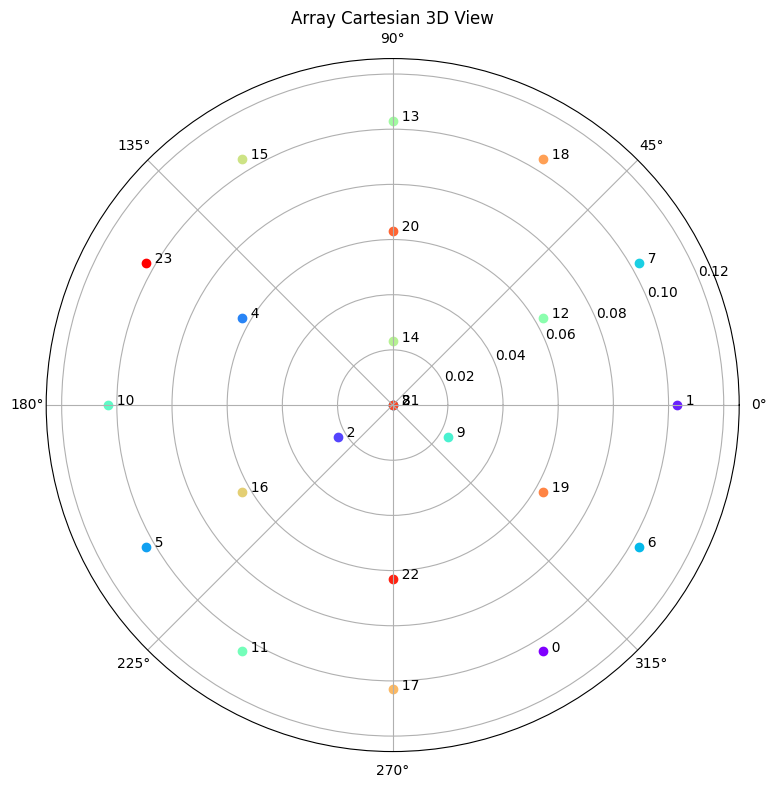

In [83]:
geometry = pd.read_csv('../AA_geometry.tsv', header=None, sep='\t')
AA_Geometry = geometry.to_numpy()
visualizer = Visualizer(AA_Geometry)
visualizer.polar(fig_size=(10,9),save_dir = 'plot/')

['random_signal_source_info_0.dat', 'random_signal_source_info_1.dat', 'random_signal_source_info_2.dat', 'random_signal_source_info_3.dat', 'random_signal_source_info_4.dat', 'random_signal_source_info_5.dat', 'random_signal_source_info_6.dat', 'random_signal_source_info_7.dat', 'random_signal_source_info_8.dat', 'random_signal_source_info_9.dat', 'random_signal_source_info_10.dat', 'random_signal_source_info_11.dat', 'random_signal_source_info_12.dat', 'random_signal_source_info_13.dat', 'random_signal_source_info_14.dat', 'random_signal_source_info_15.dat', 'random_signal_source_info_16.dat', 'random_signal_source_info_17.dat', 'random_signal_source_info_18.dat', 'random_signal_source_info_19.dat']
['random_signal_source_info_0_tau.bin', 'random_signal_source_info_1_tau.bin', 'random_signal_source_info_2_tau.bin', 'random_signal_source_info_3_tau.bin', 'random_signal_source_info_4_tau.bin', 'random_signal_source_info_5_tau.bin', 'random_signal_source_info_6_tau.bin', 'random_signal_

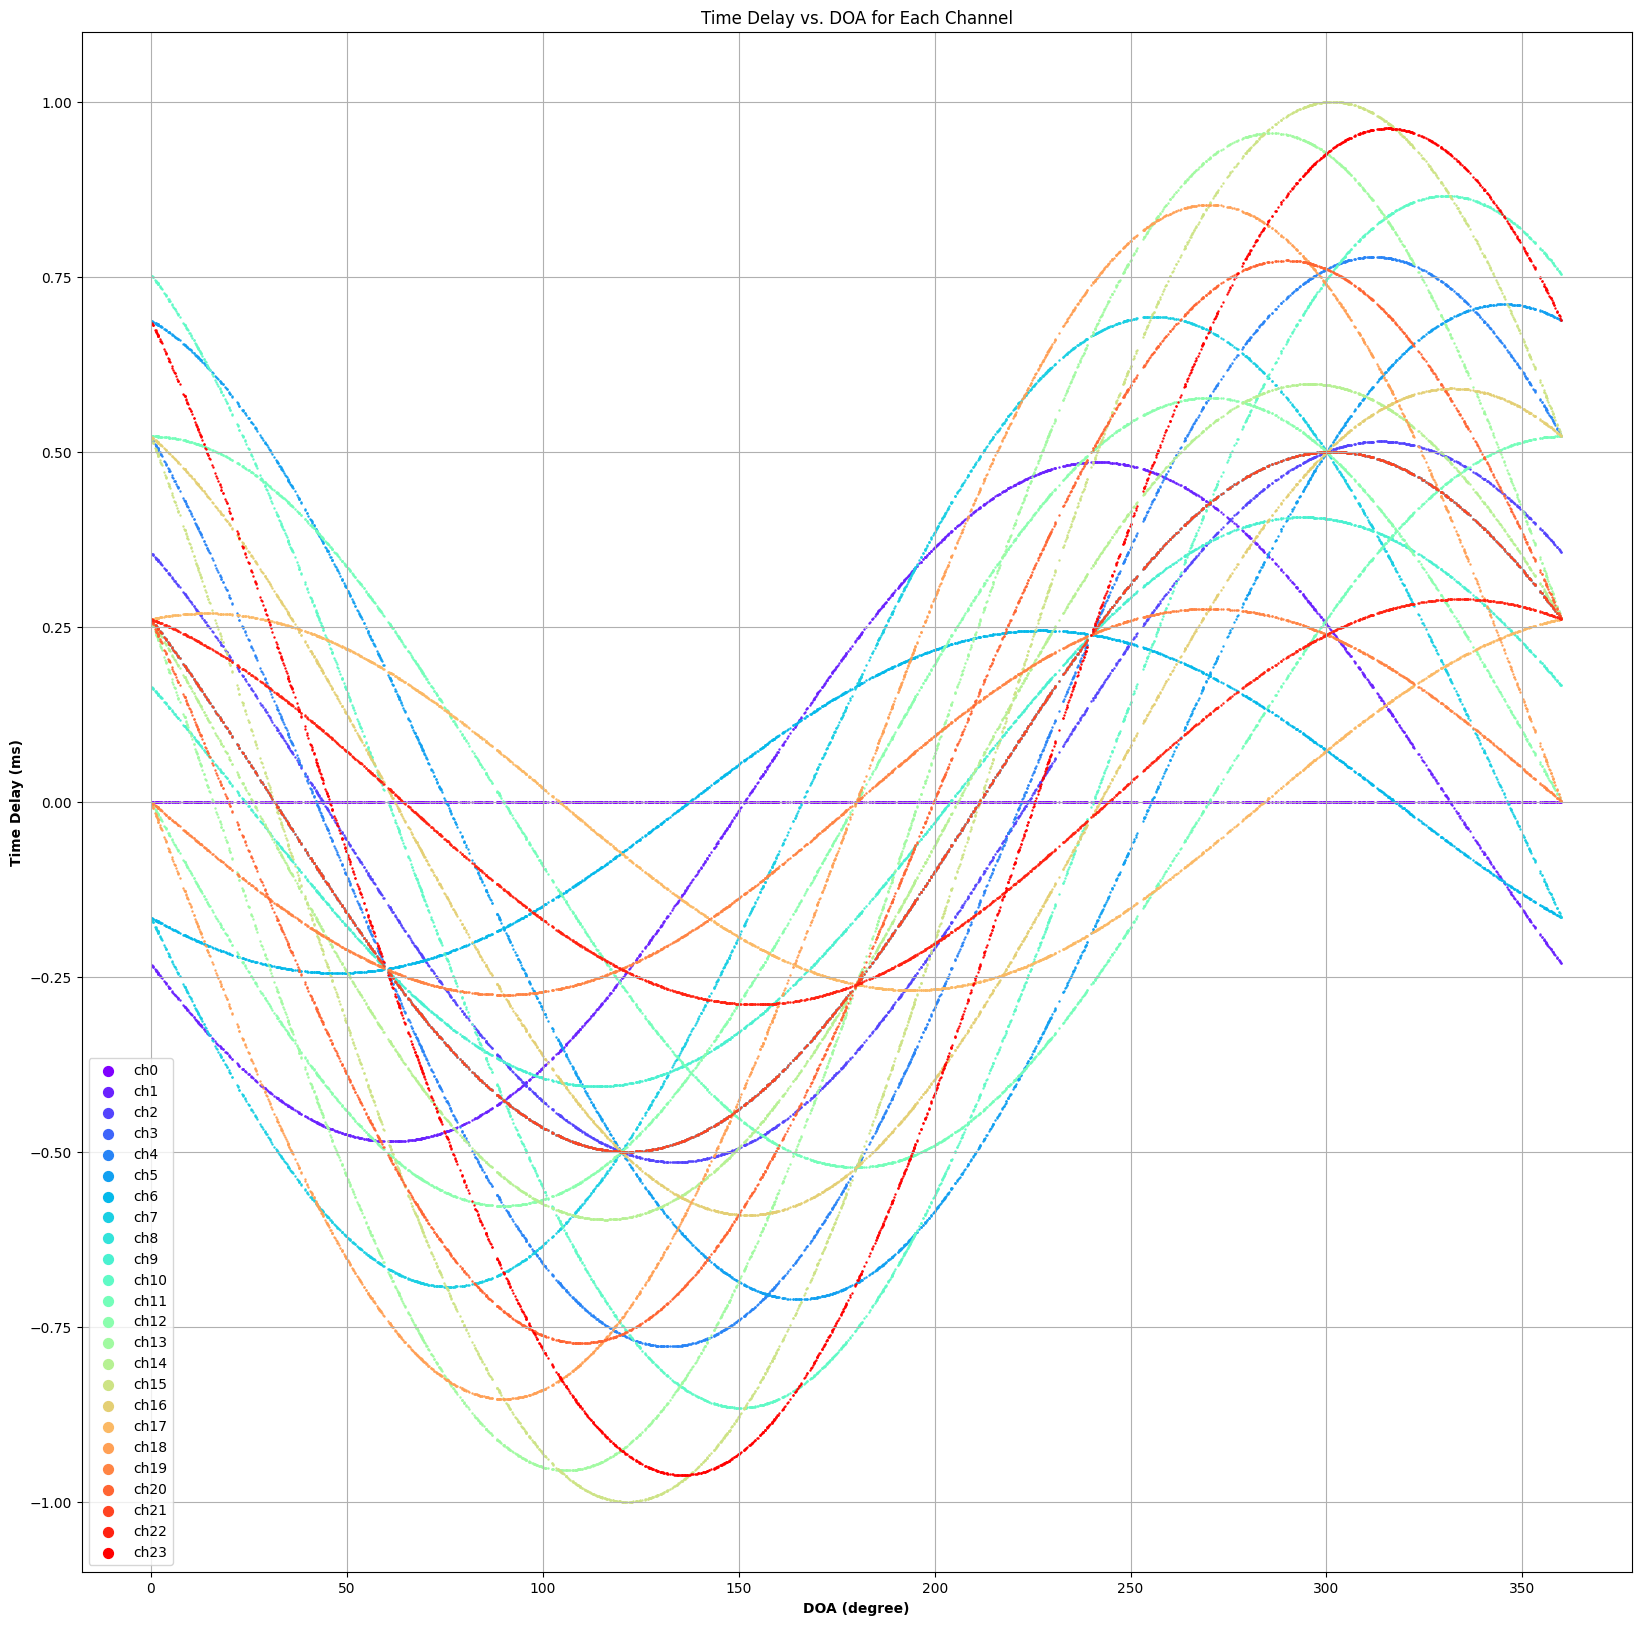

In [84]:
# Extract data from files
data = DataExtract("../data/rss360/", 24)
inputs, labels = data.get_delays_angles()
data.plot()

In [87]:
df_with_he = pd.read_csv("plot/models_evaluation_with_weights_initialization.csv")
list_channels = [re.findall(r'\d+',item['Channels']) for i,item in df_without_he.iterrows()]
list_channels = [sorted([int(i) for i in ls]) for ls in list_channels]
list_channels

[[1, 14, 21],
 [12, 14, 20],
 [10, 11, 13],
 [8, 17, 22],
 [6, 11, 20],
 [7, 8, 21],
 [0, 12, 22],
 [8, 11, 13],
 [2, 10, 22],
 [7, 15, 22],
 [8, 16, 23],
 [1, 4, 14],
 [1, 5, 12],
 [7, 8, 11],
 [3, 11, 17],
 [6, 12, 13],
 [3, 7, 10],
 [4, 13, 23],
 [10, 13, 22],
 [4, 9, 15],
 [4, 16, 17],
 [3, 10, 13],
 [3, 10, 13],
 [8, 10, 15],
 [6, 16, 22],
 [15, 19, 21],
 [1, 13, 19],
 [5, 18, 21],
 [3, 4, 21],
 [7, 9, 11],
 [8, 15, 17],
 [0, 7, 18],
 [1, 14, 21],
 [17, 20, 22],
 [5, 13, 14],
 [4, 14, 22],
 [0, 15, 23],
 [5, 15, 23],
 [3, 7, 10],
 [0, 2, 12],
 [2, 10, 19],
 [3, 9, 20],
 [6, 15, 21],
 [3, 12, 20],
 [10, 12, 13],
 [0, 7, 17],
 [10, 11, 18],
 [13, 14, 16],
 [5, 12, 22],
 [15, 19, 23],
 [0, 2, 4, 6, 14, 23],
 [2, 4, 5, 6, 10, 16],
 [1, 5, 6, 15, 16, 22],
 [2, 5, 9, 13, 17, 22],
 [2, 10, 12, 14, 20, 23],
 [5, 6, 7, 13, 19, 23],
 [5, 11, 13, 15, 21, 22],
 [3, 8, 14, 15, 16, 17],
 [10, 14, 16, 17, 20, 21],
 [0, 1, 2, 13, 14, 15],
 [0, 2, 5, 7, 9, 18],
 [2, 3, 9, 10, 11, 15],
 [4, 8, 9, 1

In [89]:
# Get the list of channels with loss less than 75
# The 75 is a convience number from the results
top_without_he =  df_without_he.index[df_with_he['Loss'] < 50].tolist()
top_list_channels = [list_channels[i] for i in top_without_he]
top_list_channels

[[6, 12, 13],
 [1, 13, 19],
 [0, 7, 18],
 [3, 12, 20],
 [2, 7, 9, 13, 19, 20],
 [8, 12, 16, 18, 21, 22],
 [2, 6, 8, 9, 12, 15, 18, 20, 22]]

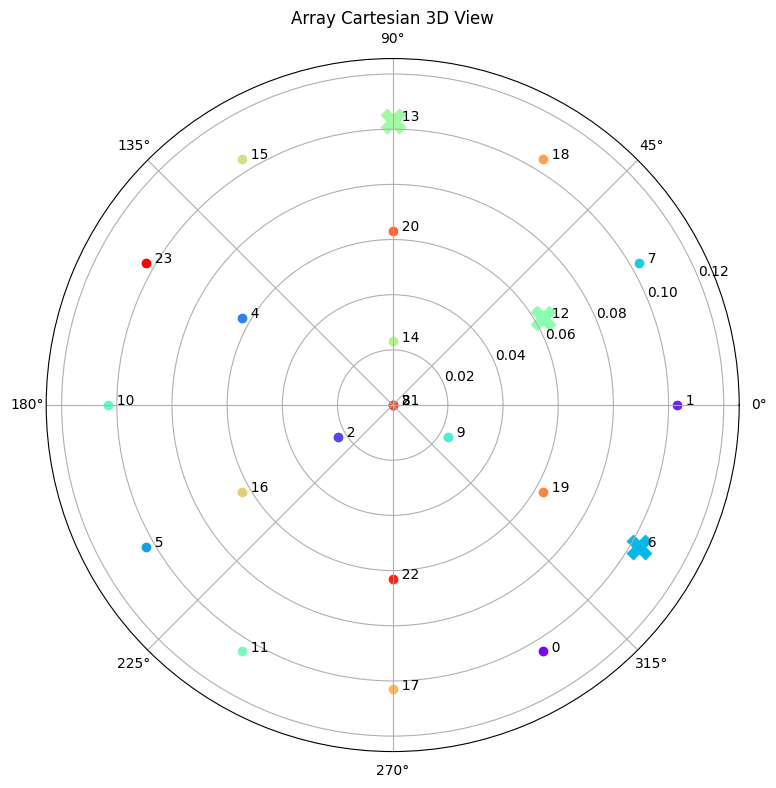

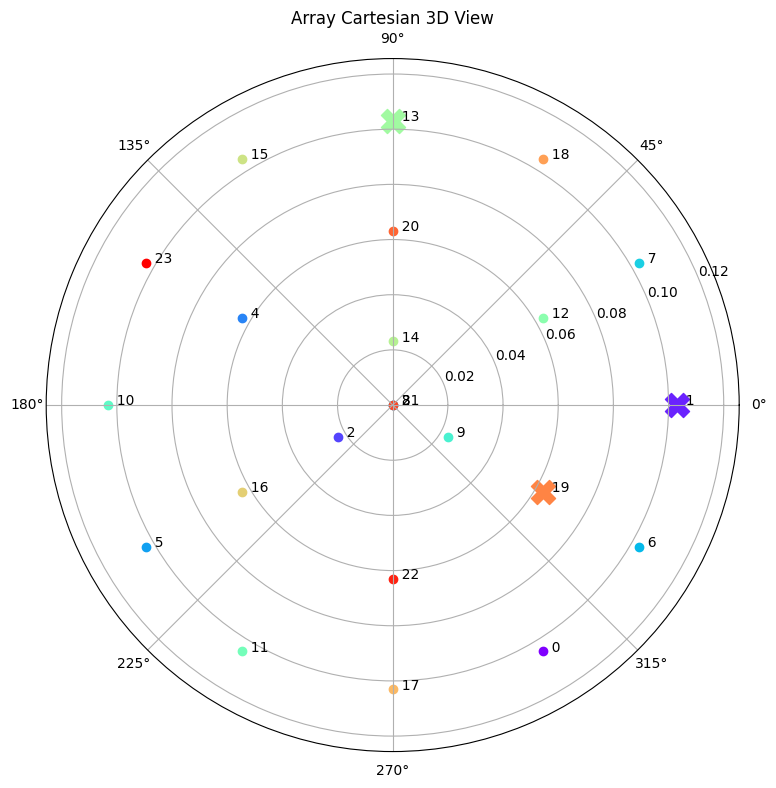

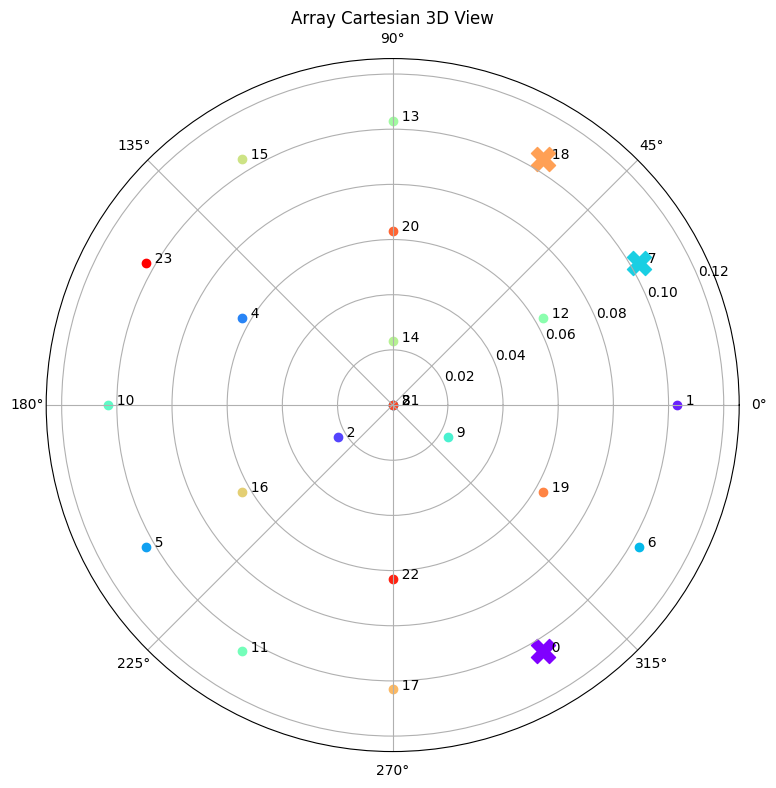

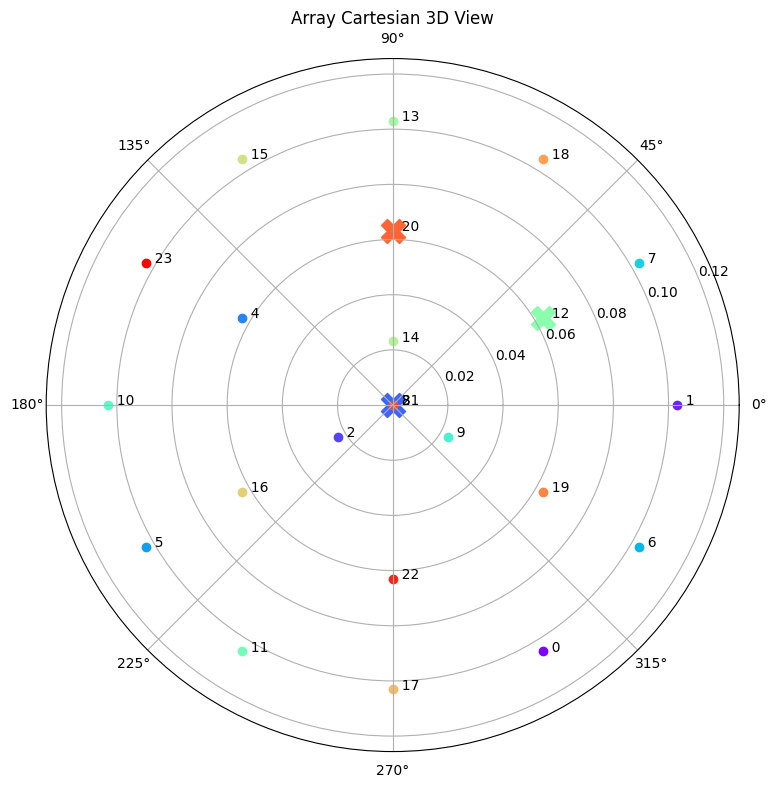

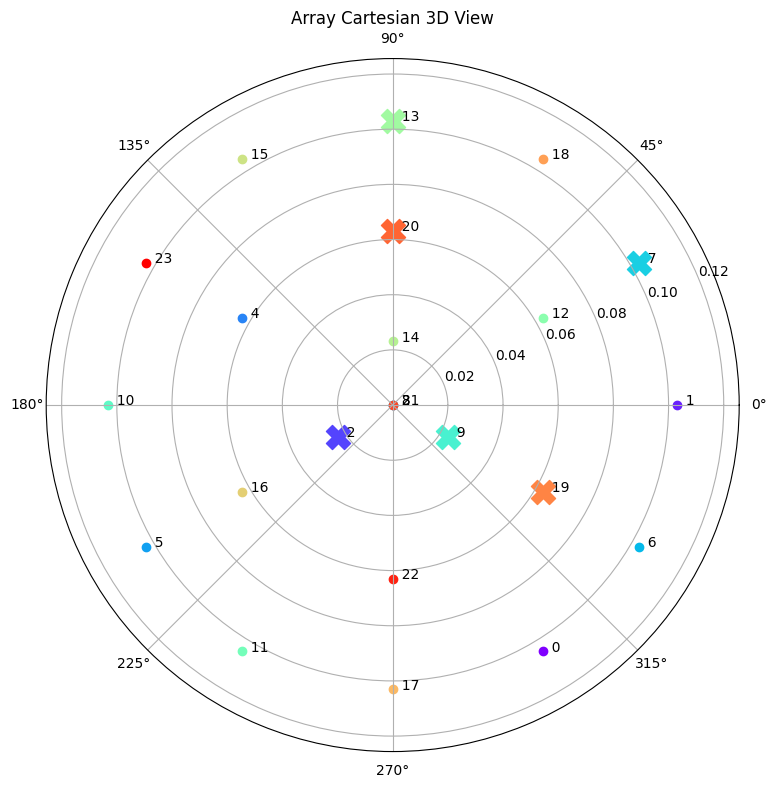

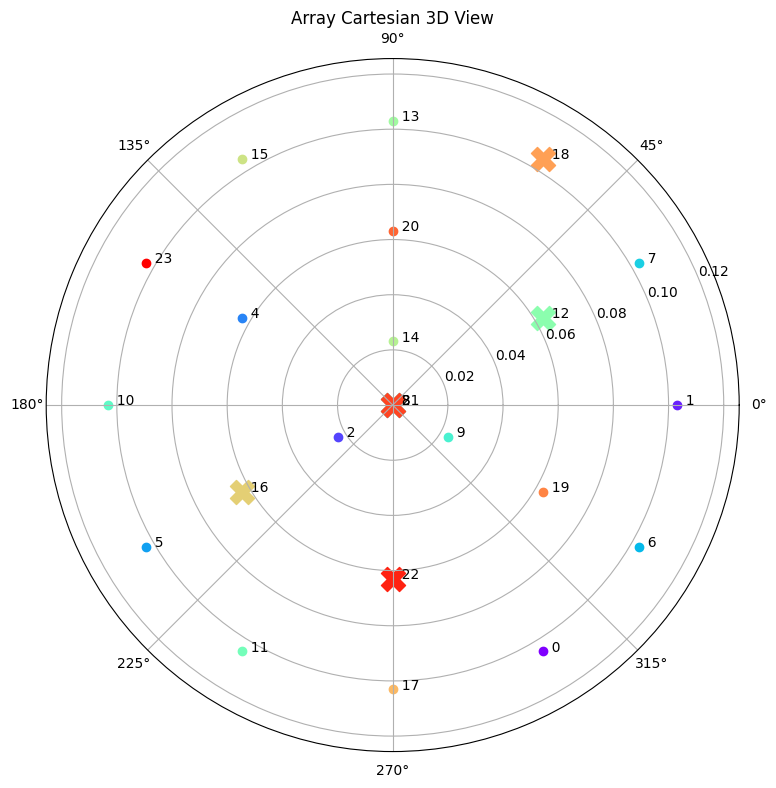

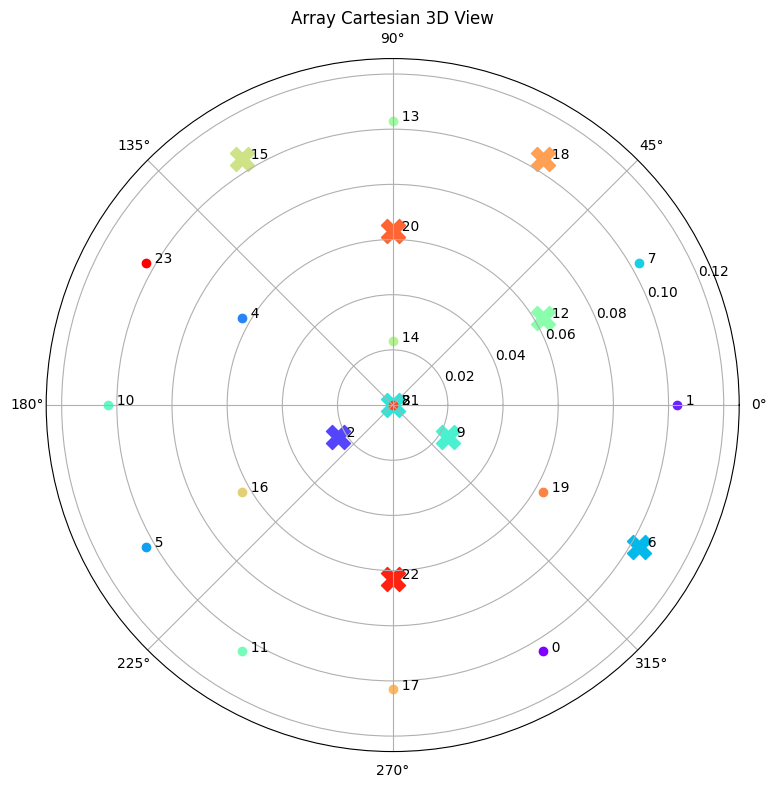

In [90]:
for channels in top_list_channels:
    visualizer.polar(fig_size=(10,9), channels = channels)

[[0.006843581795692444, 458.61358642578125, 2.617692232131958]]

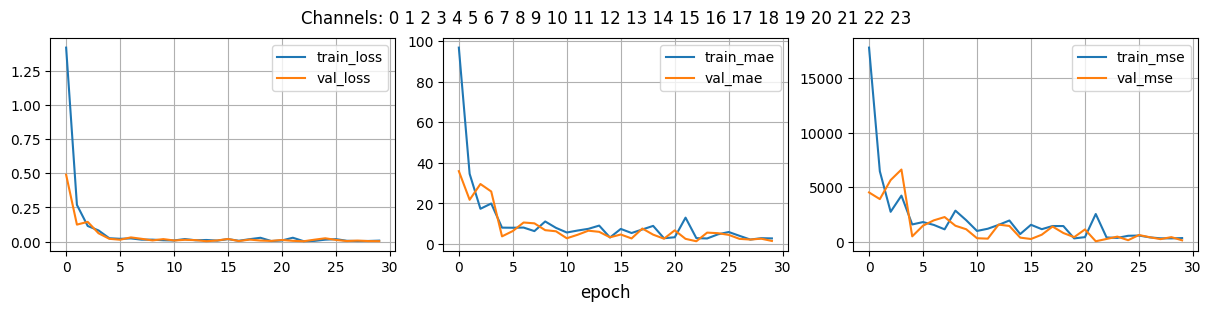

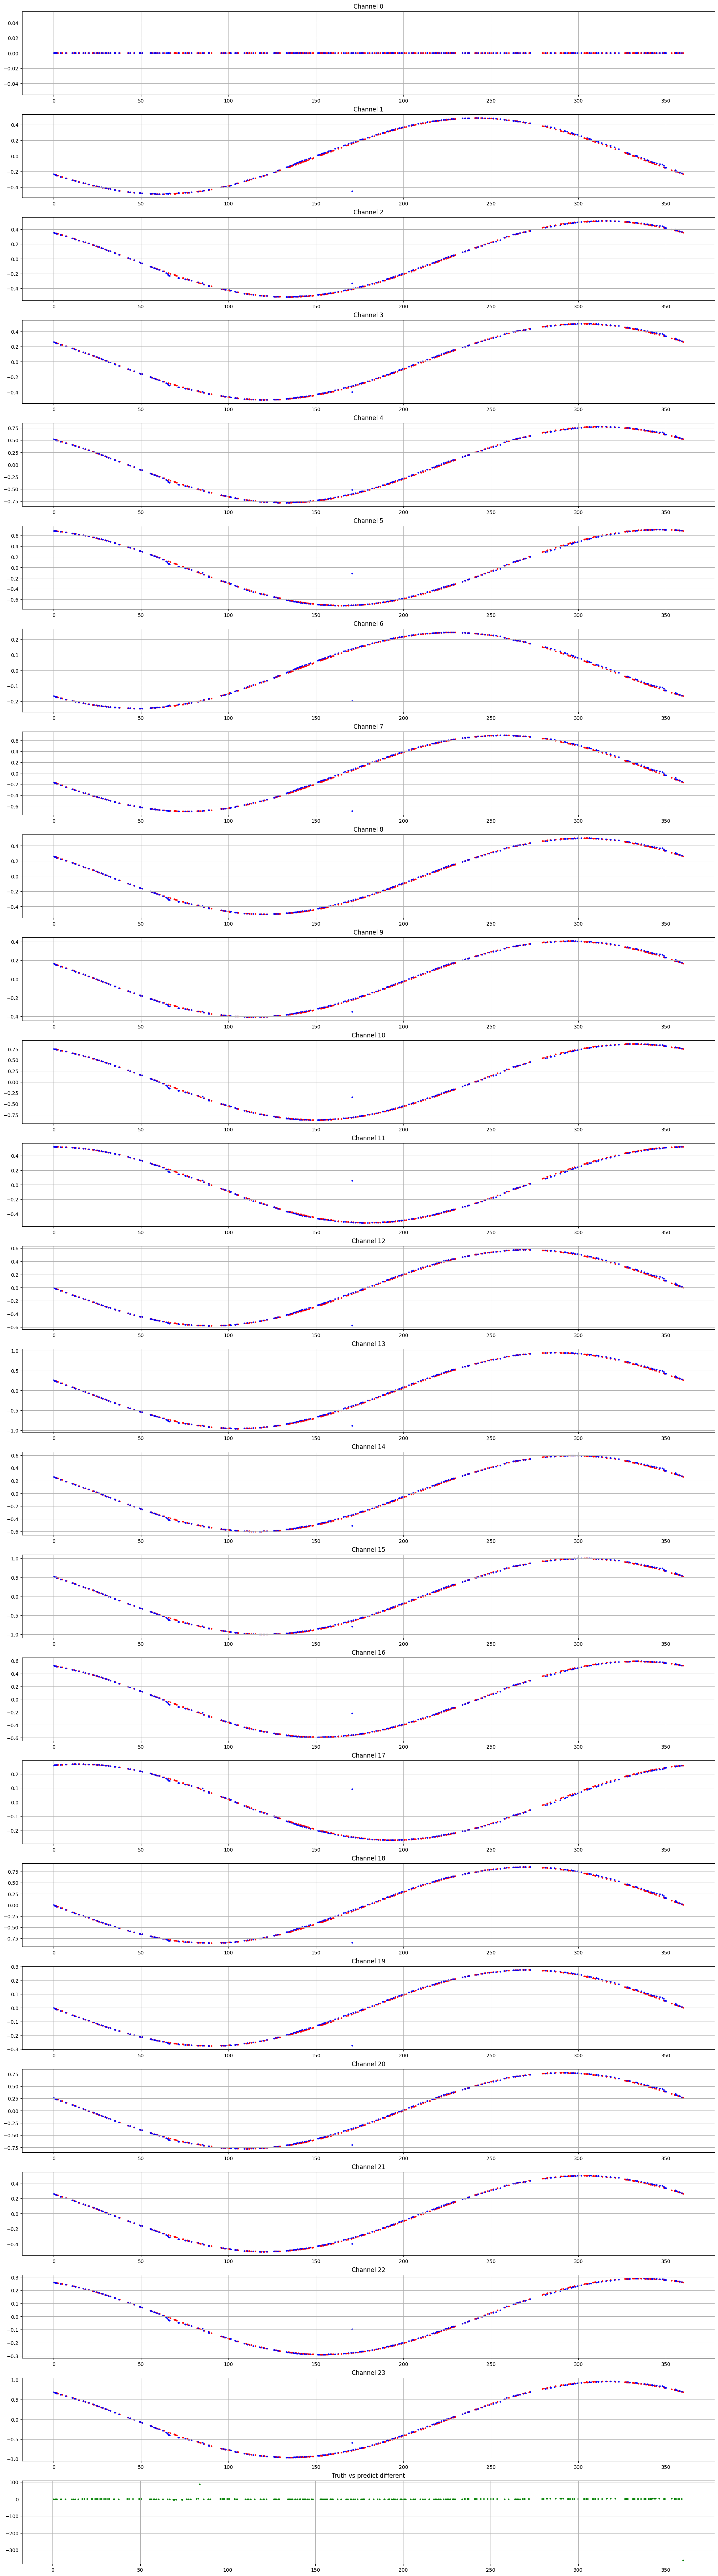

In [155]:
models, evaluates, losses = training_evaluation(top_list_channels, inputs, labels,\
                                                he_initializer=True, loss = 'cossin',\
                                                epochs=30, plot=True)
evaluates

2025-03-31 00:52:08.557061: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


[[0.00011021281534340233, 0.36233842372894287, 0.2549373507499695],
 [0.00013325094187166542, 0.4374663233757019, 0.48724356293678284],
 [0.031213220208883286, 2224.30078125, 11.831103324890137],
 [0.01516907662153244, 512.9459838867188, 4.2343597412109375],
 [0.0018917425768449903, 1712.2921142578125, 6.845765113830566],
 [1.2897248780063819e-05, 0.04233952611684799, 0.13130681216716766],
 [3.739071689778939e-05, 0.12274827063083649, 0.2669123113155365]]

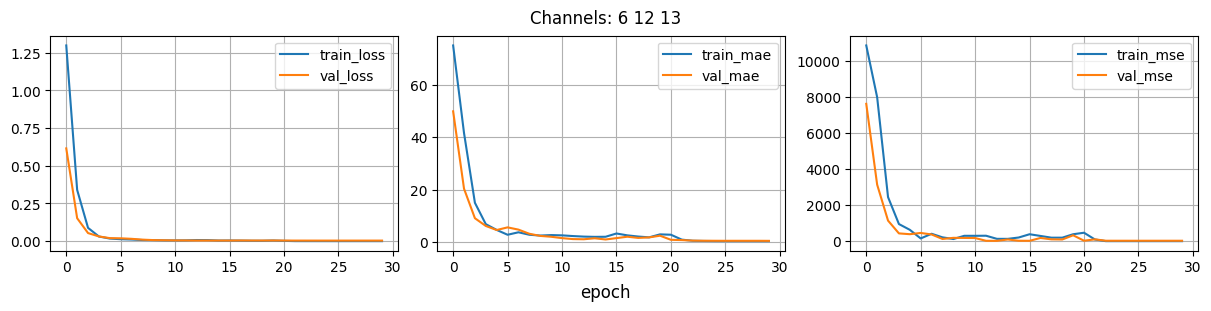

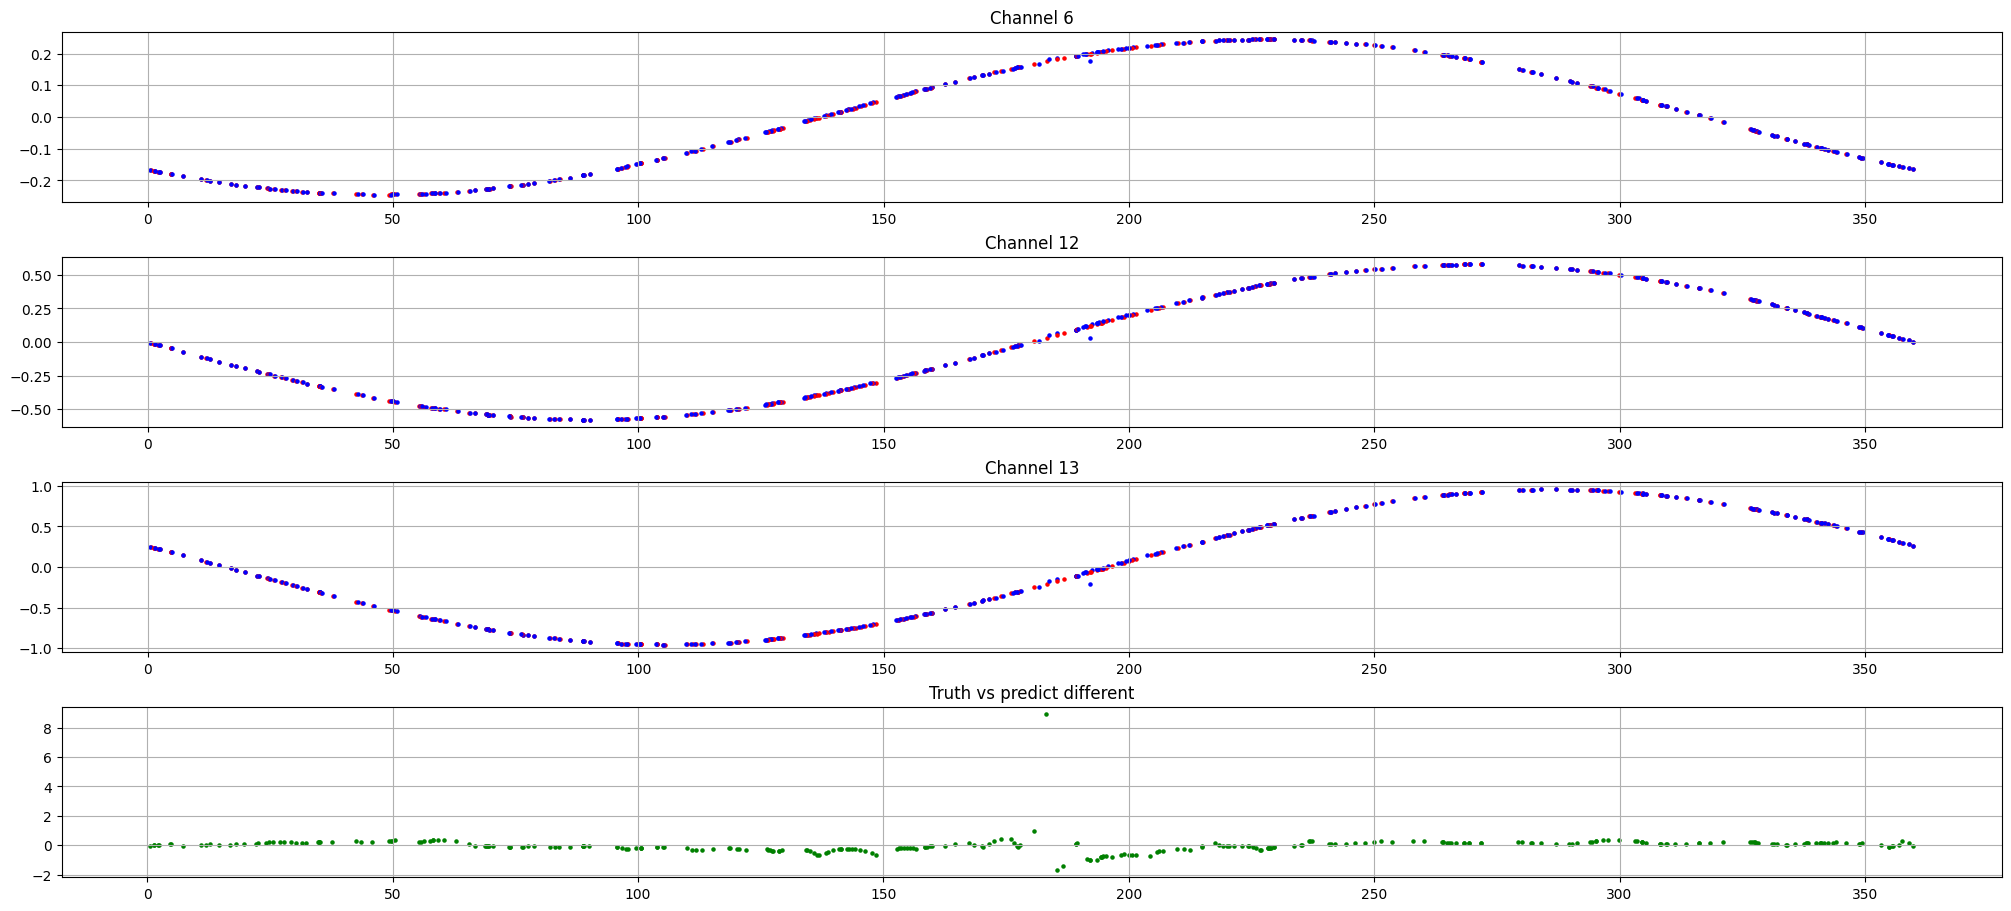

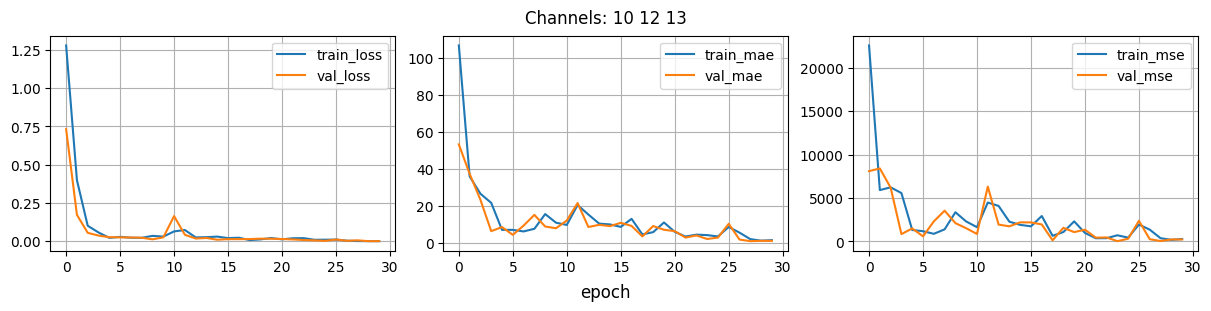

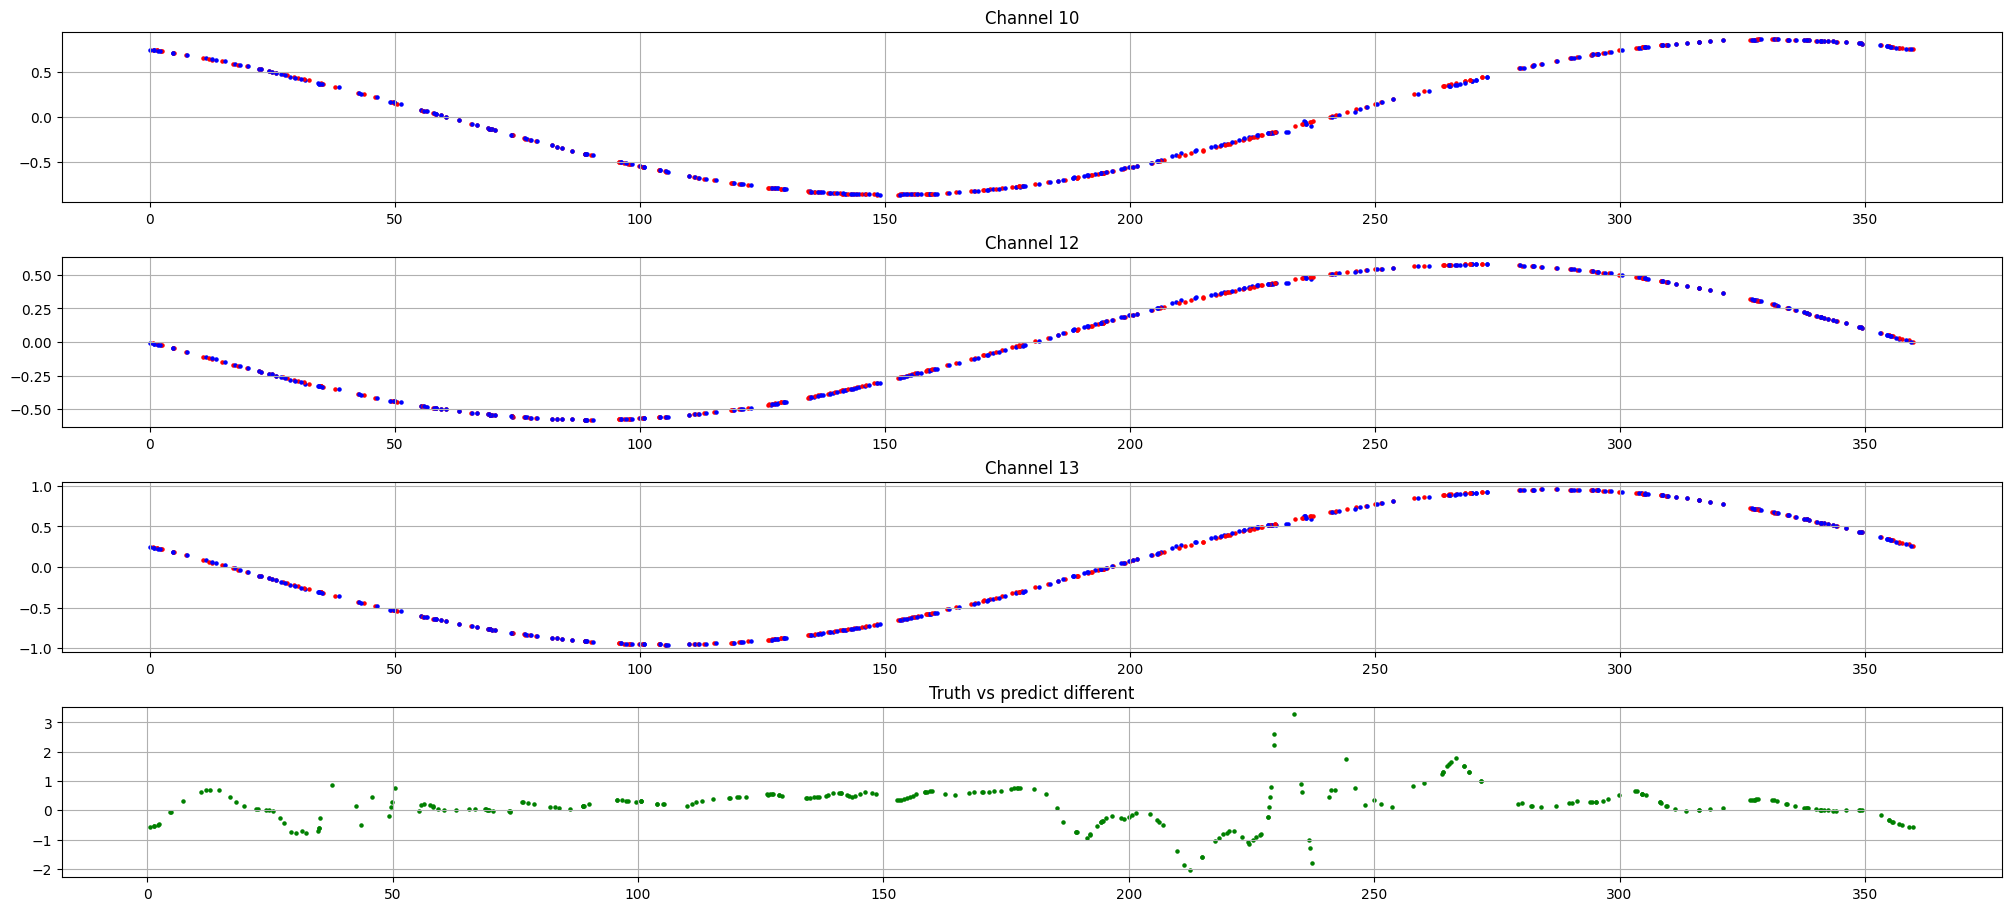

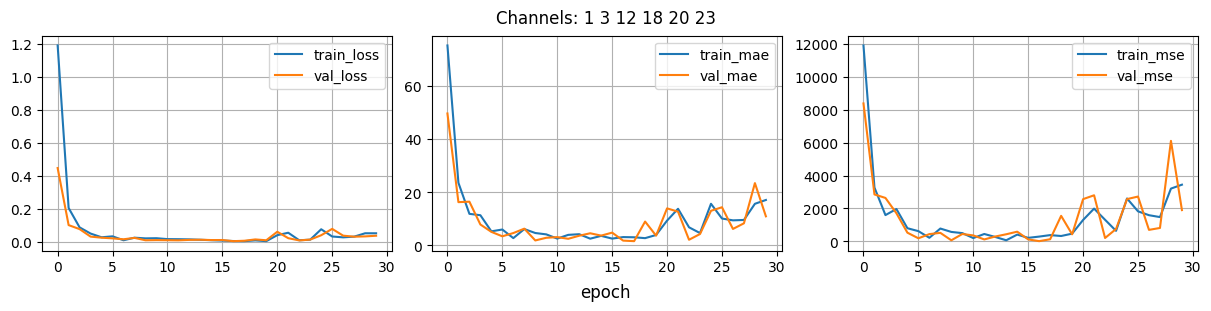

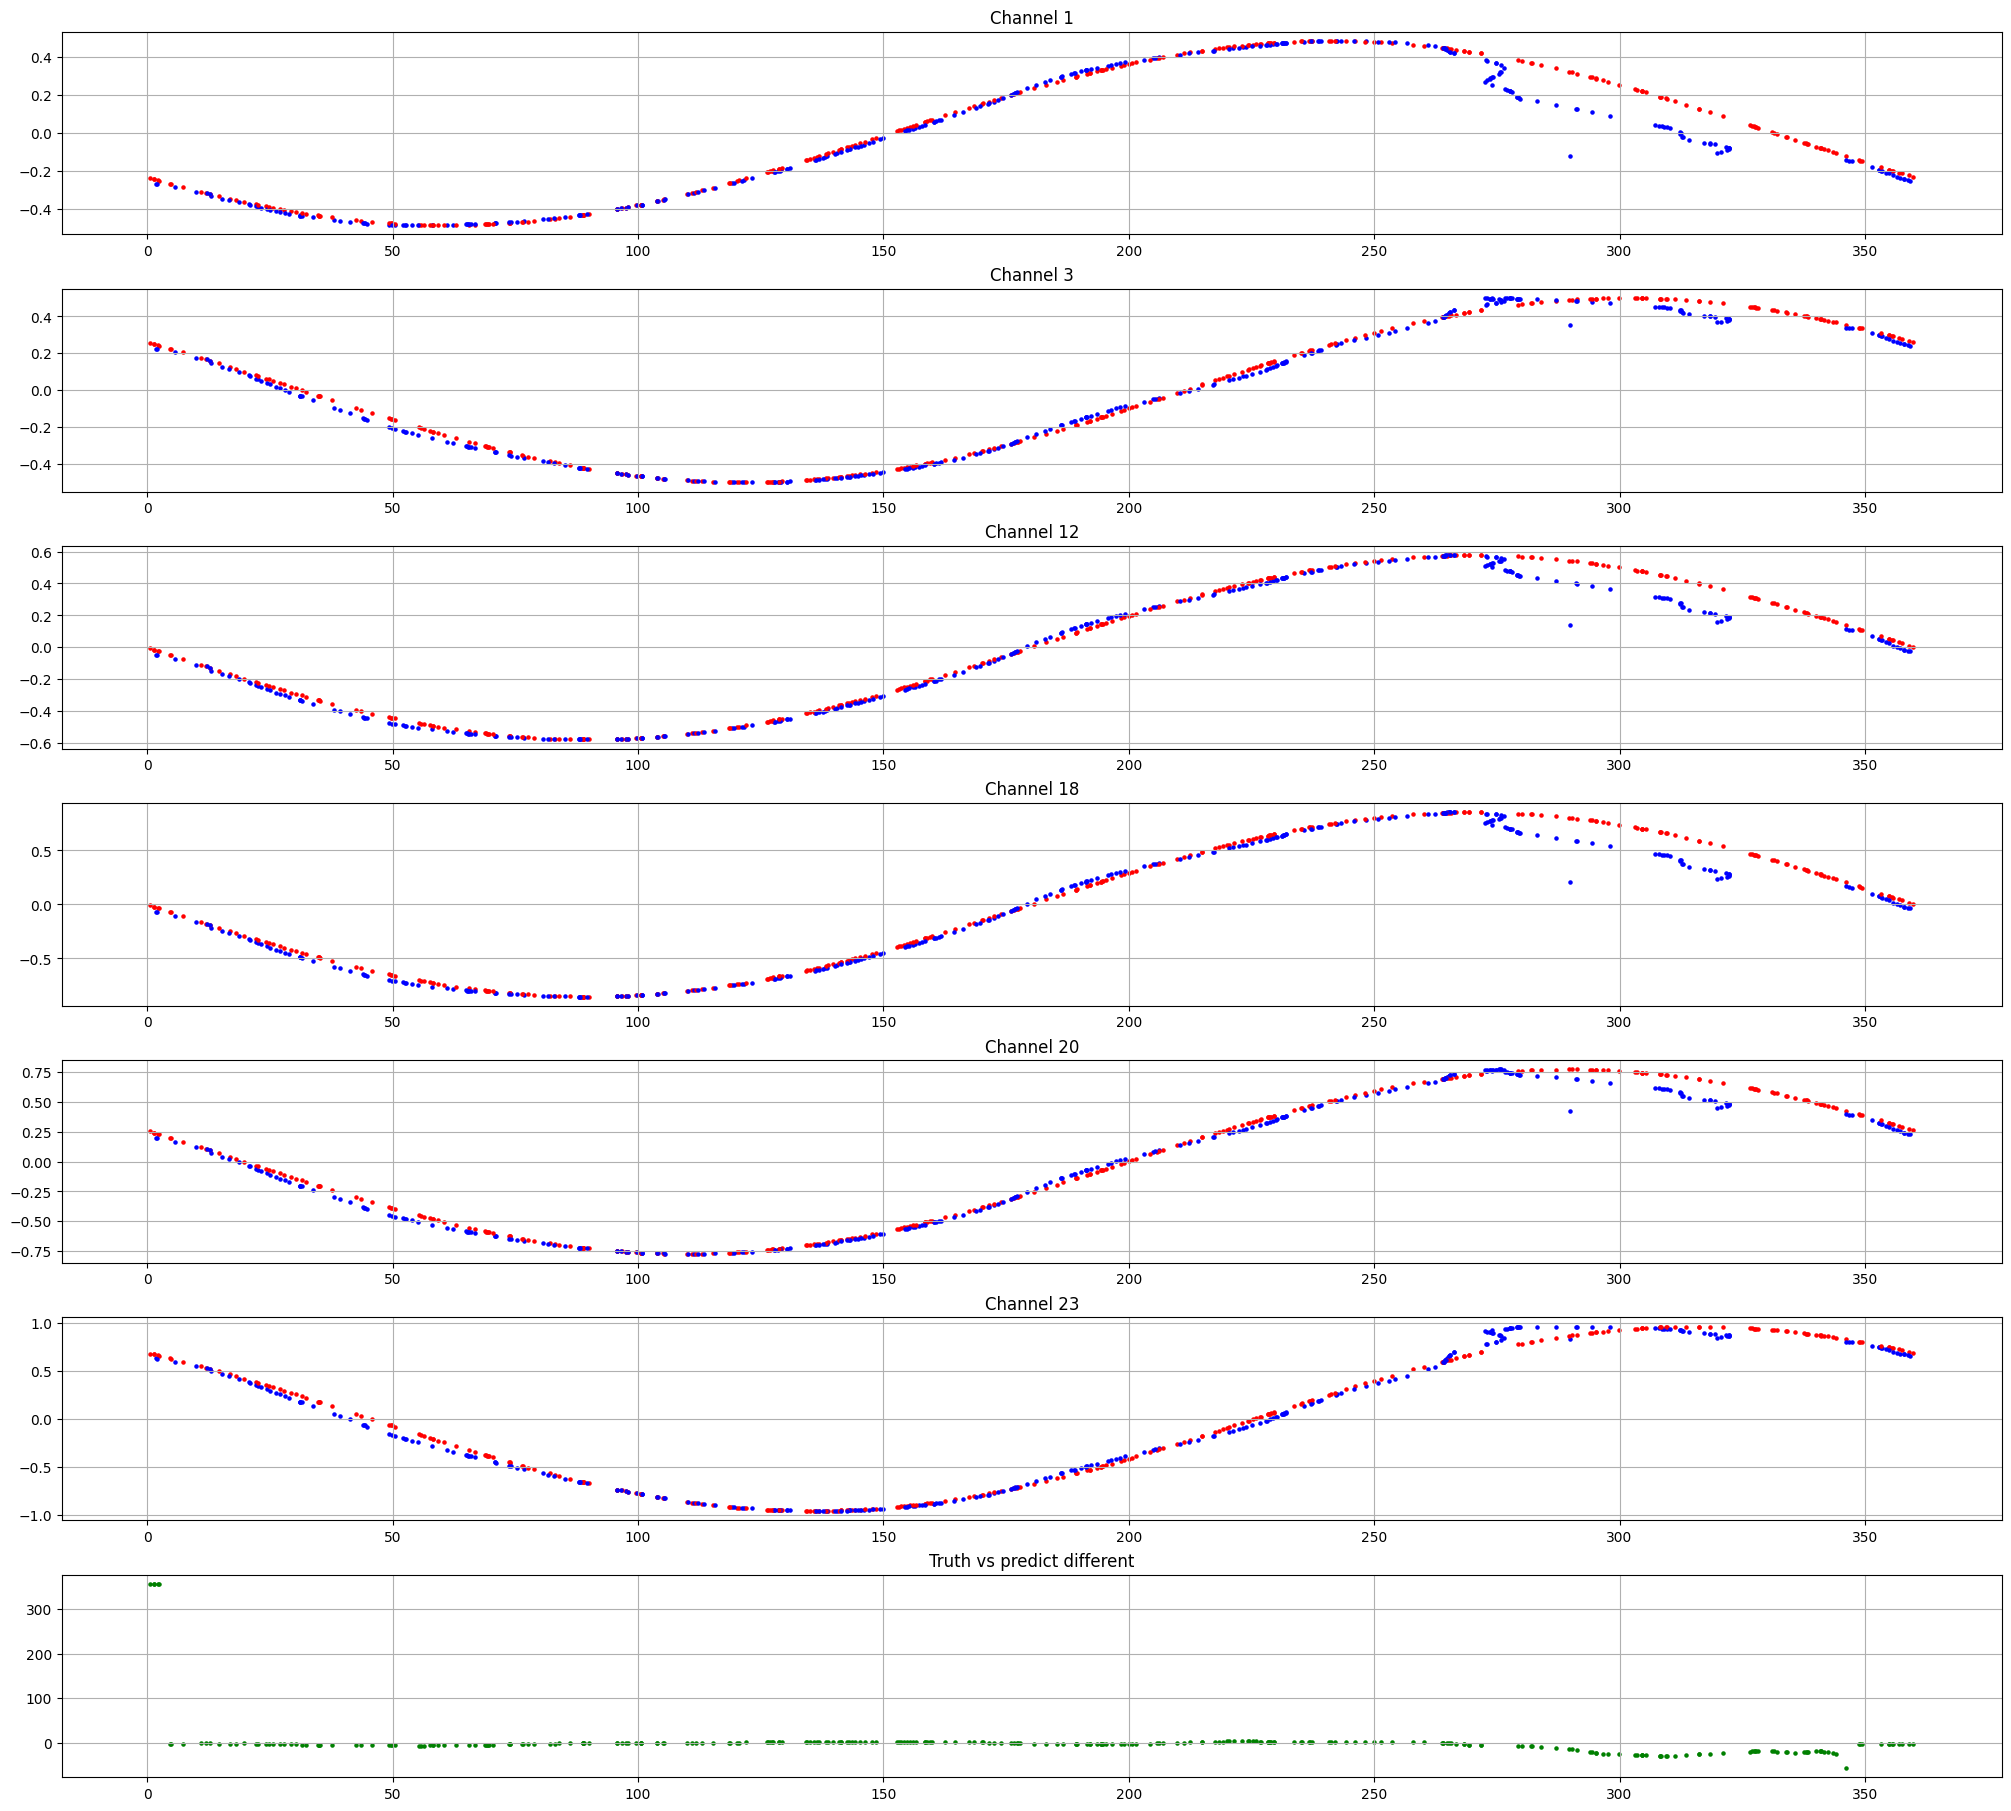

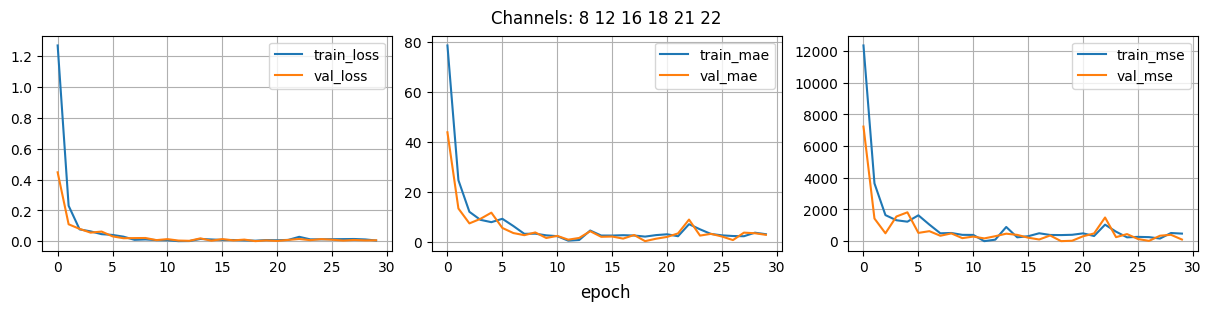

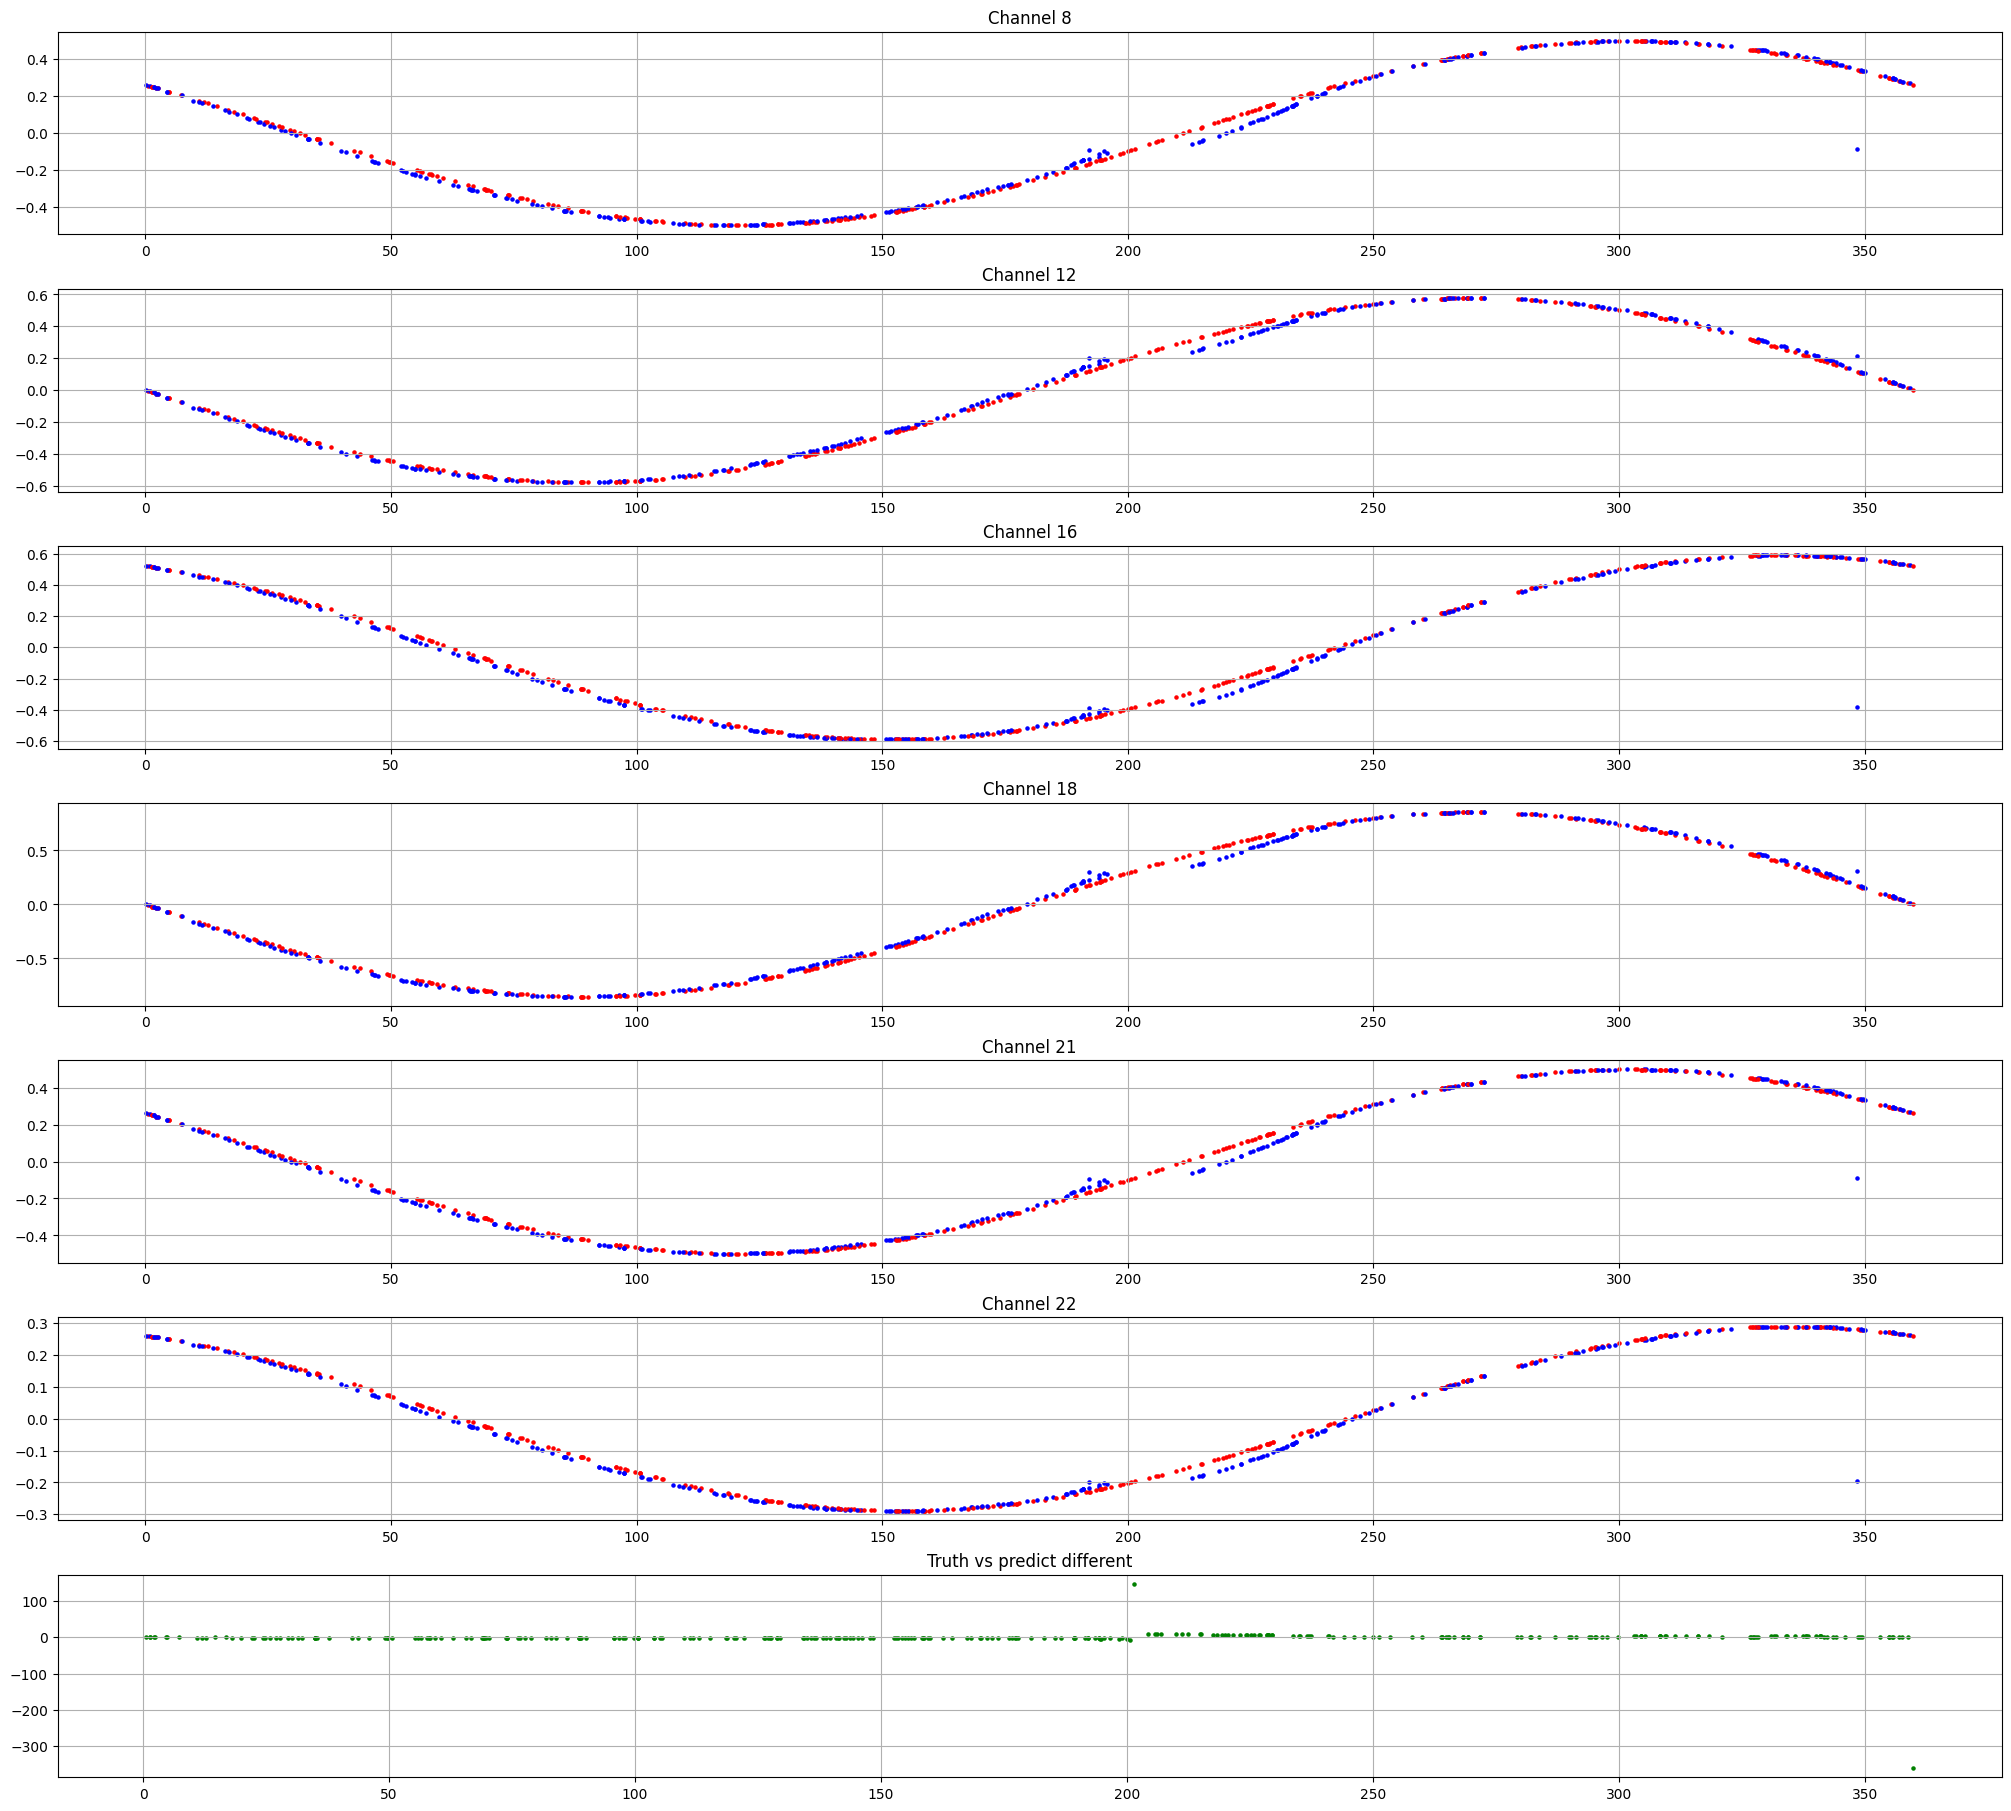

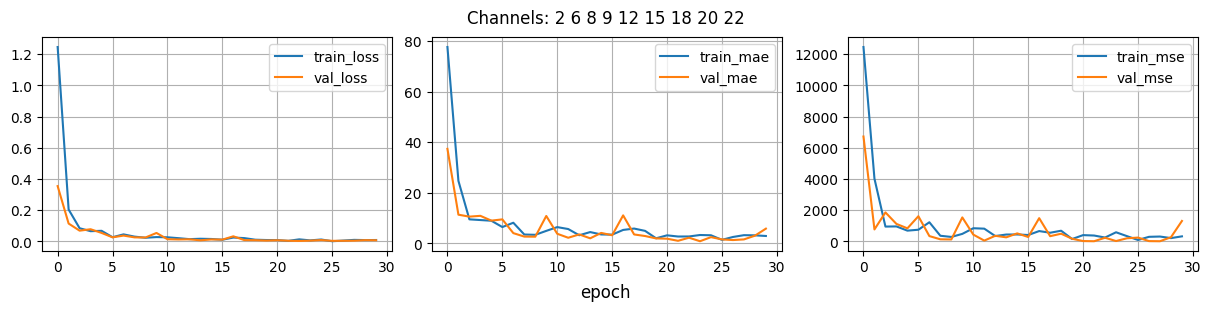

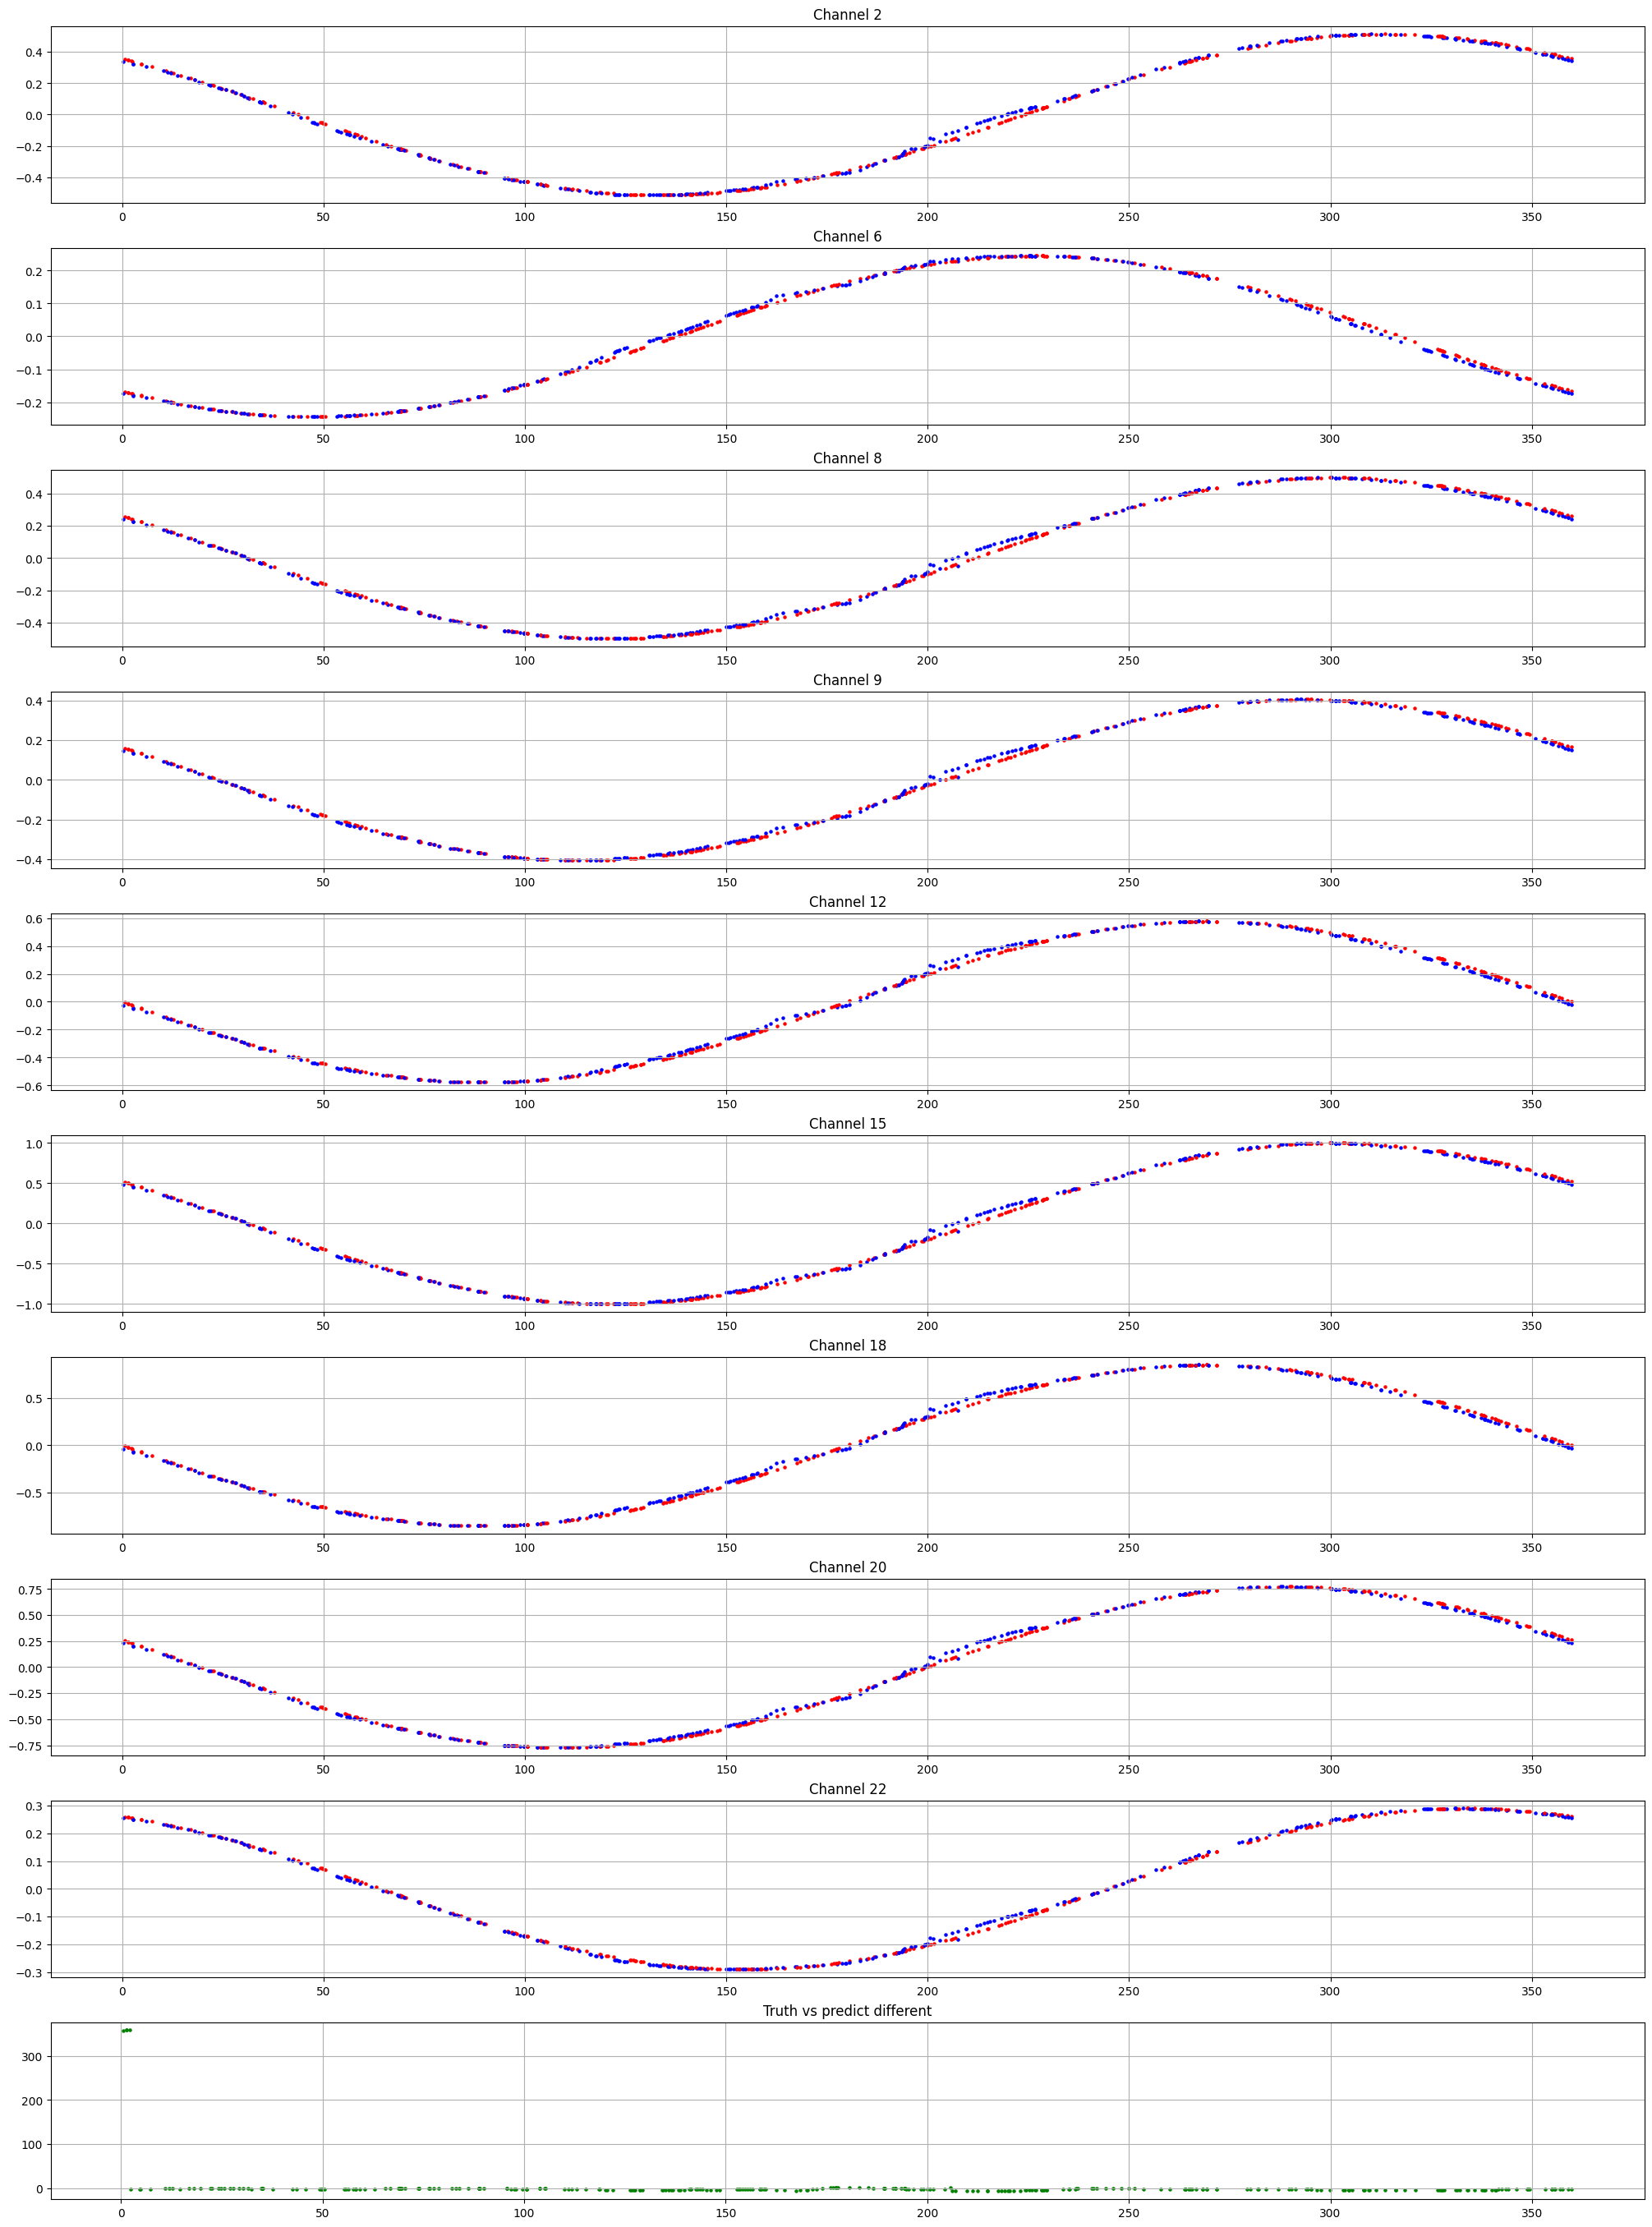

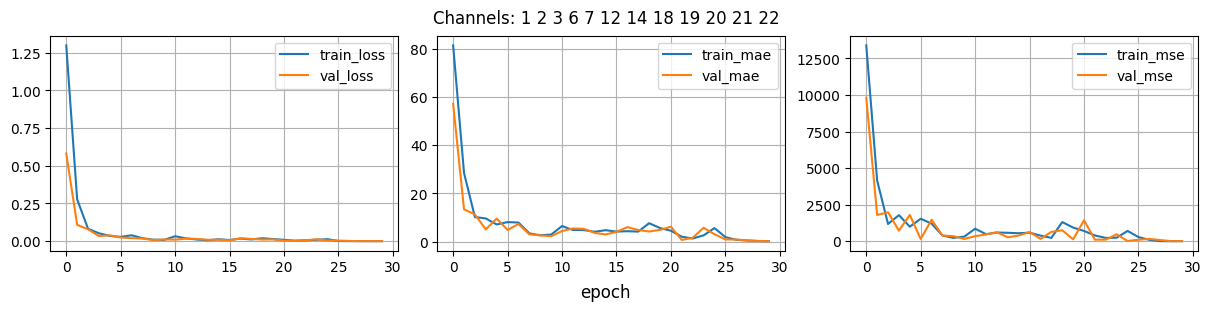

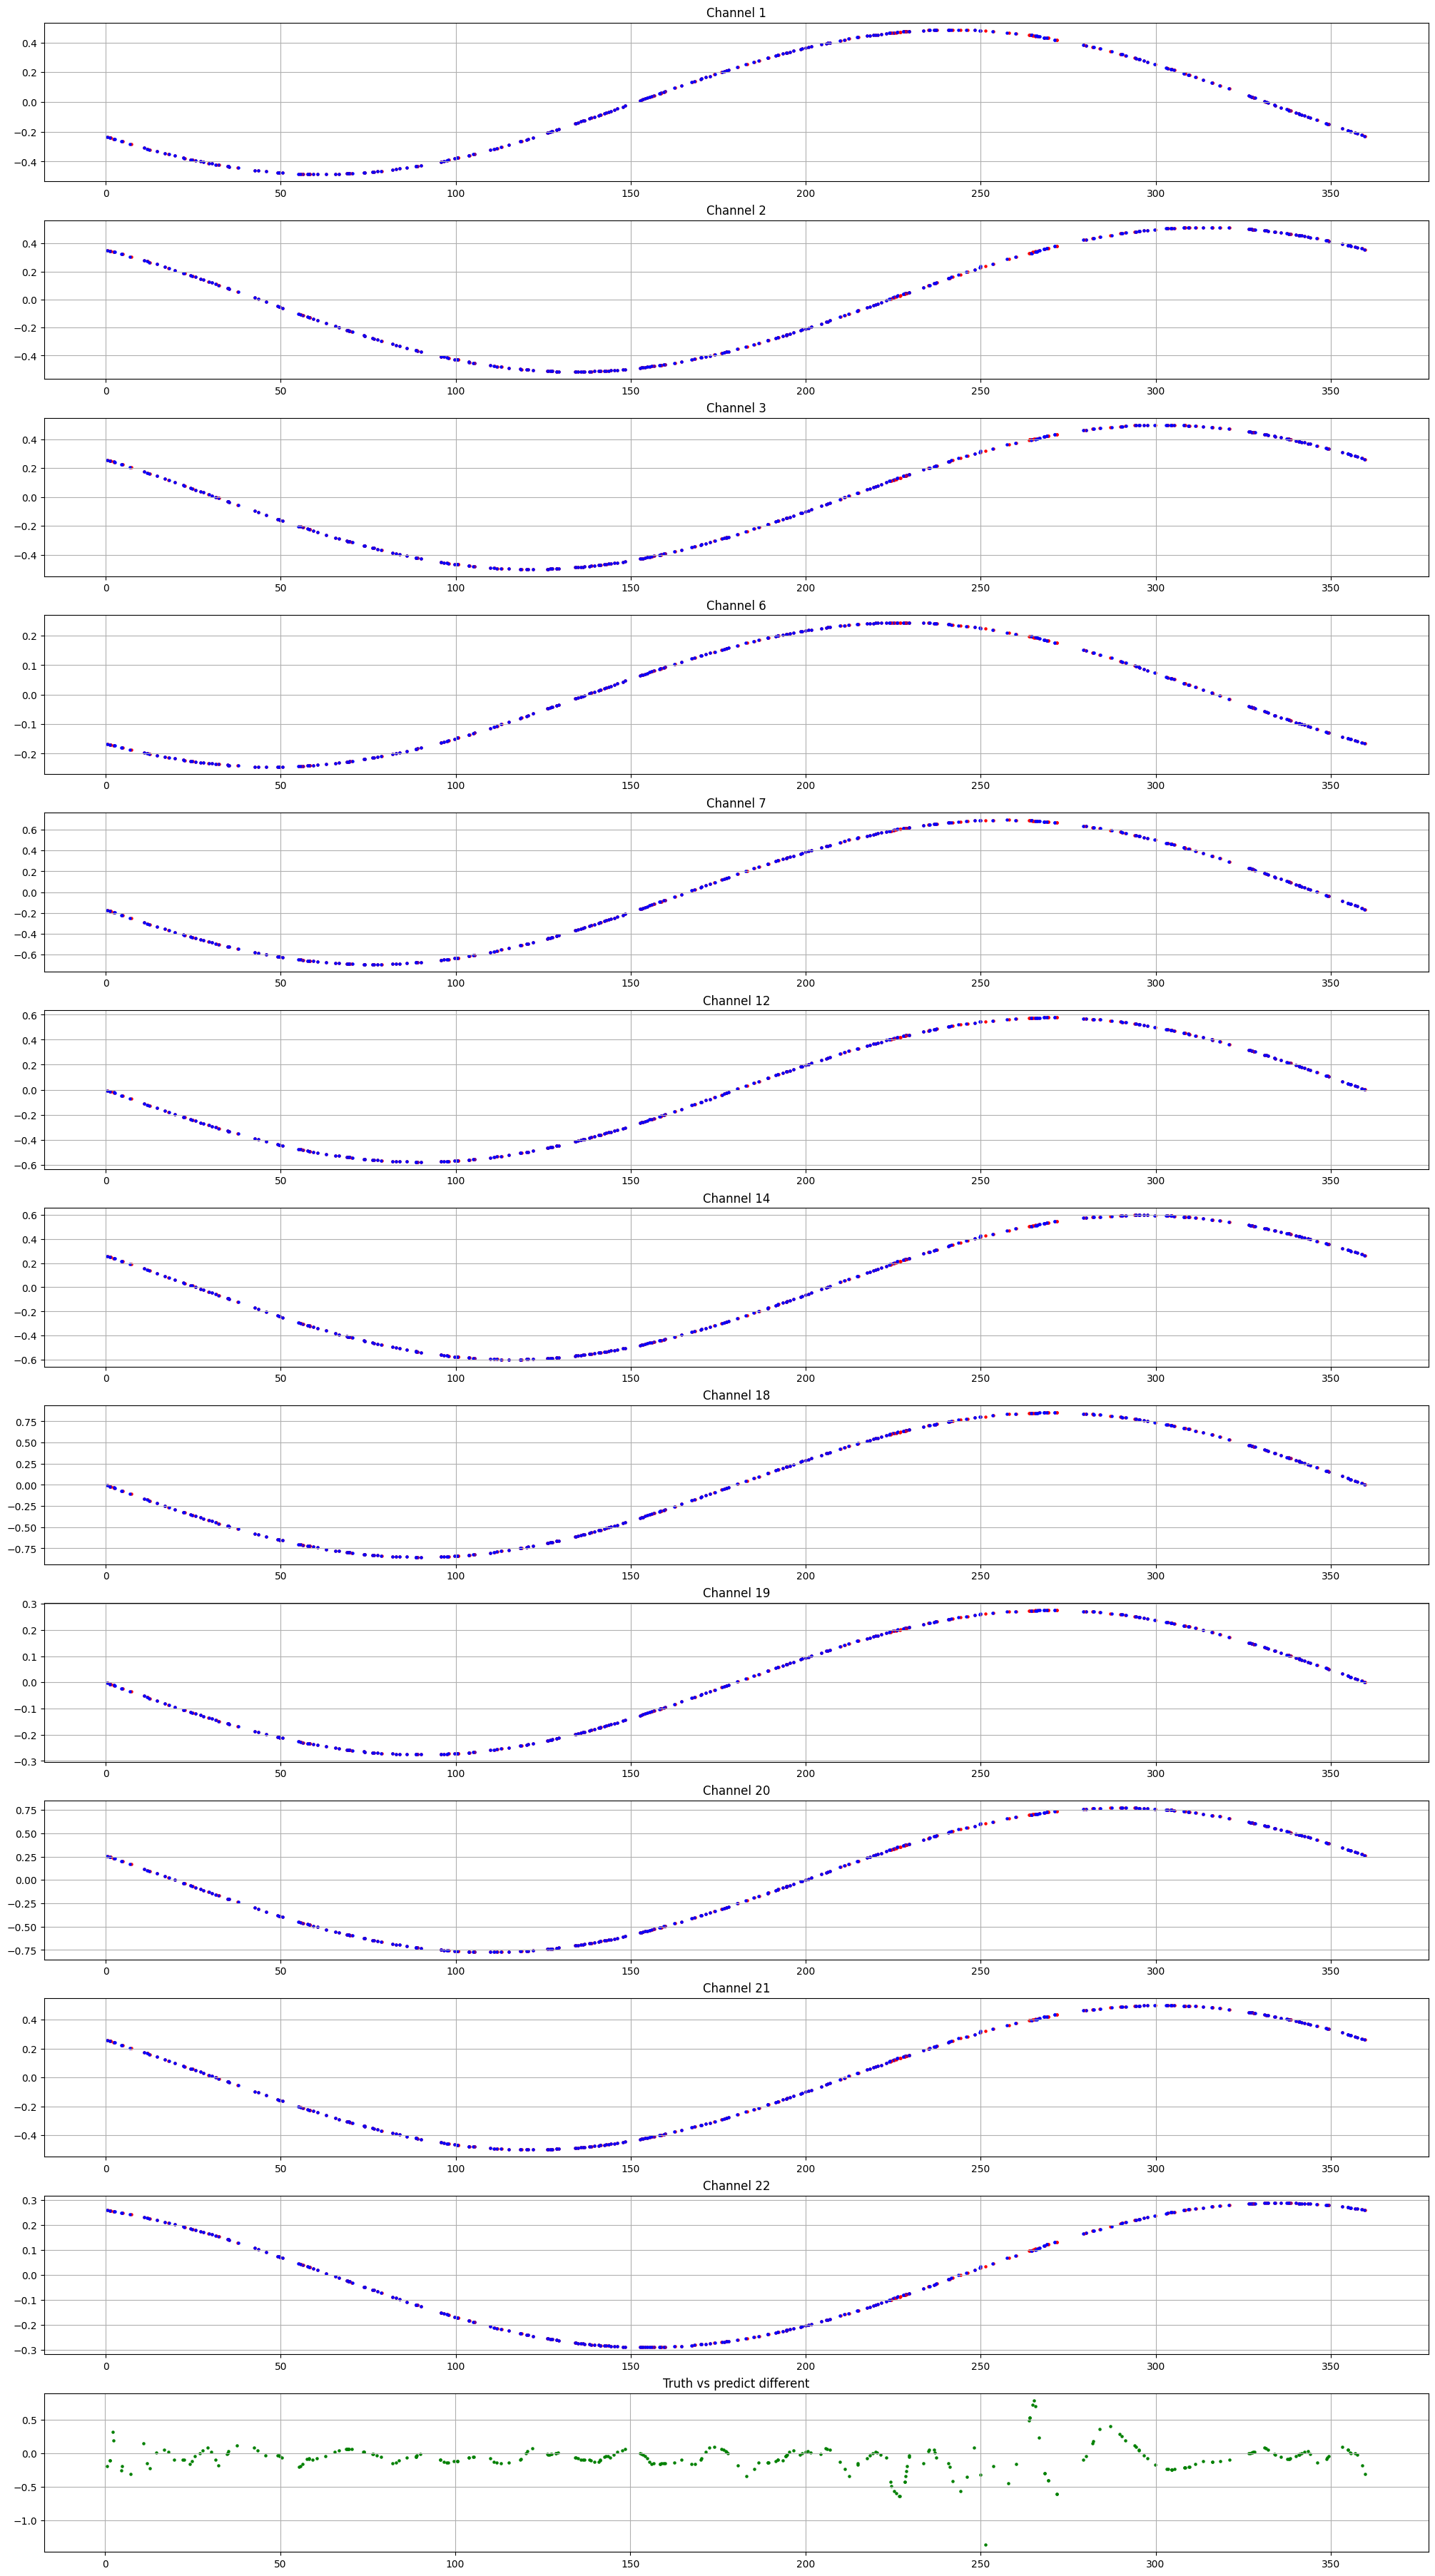

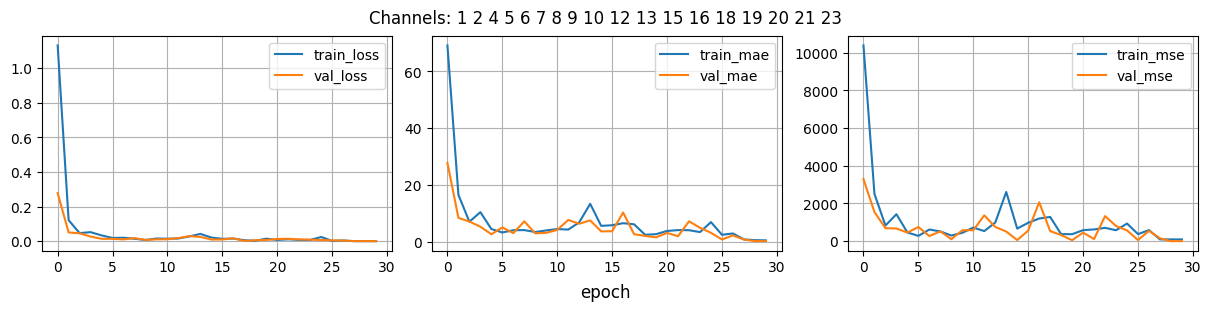

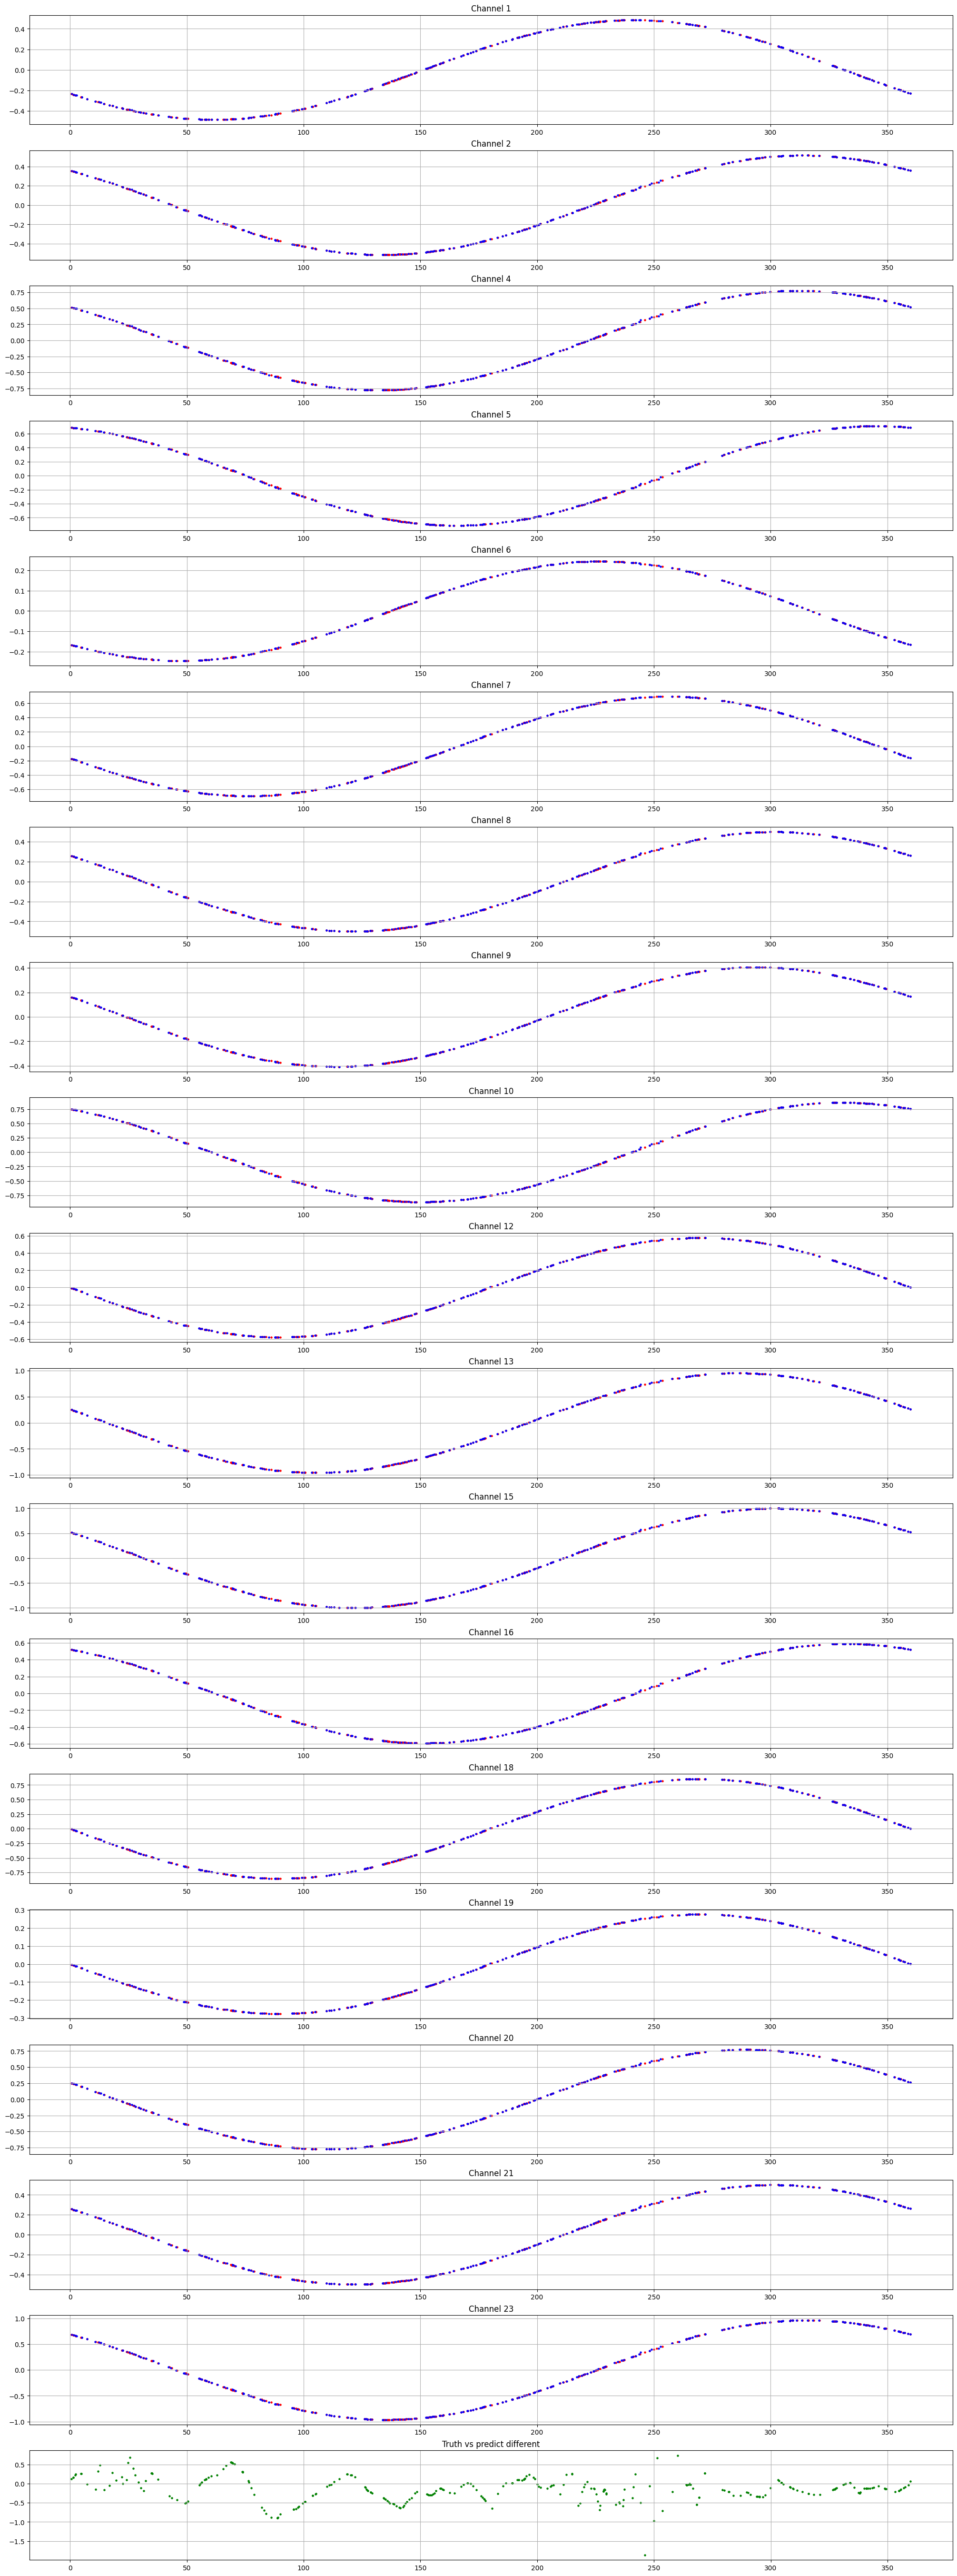

In [153]:
models, evaluates, losses = training_evaluation("relu", top_list_channels, inputs, labels, epochs=30, plot=True)
evaluates